In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def generate_polinomial_data(n_to_gen, finess=50, show_graphs=False):
    """
    A method that generates n_to_gen polinomials with finess number of points equaly displaced on 
    the interval (0,100).
    Parameters:
        - n_to_gen (int), number of polinomials to generate
        - finess (int), the number of points for each polinomial
        - show_graph (bool), if the function should also print the generated polinomials
    """
    max_dev = 5
    max_dev_zeros = max_dev - 1
    x = np.arange(finess)
    x = x / (finess / (2 * max_dev)) - max_dev
    data = []
    for _ in range(n_to_gen):
        x0 = np.random.randint(2 * max_dev_zeros) - max_dev_zeros
        x1 = np.random.randint(2 * max_dev_zeros) - max_dev_zeros
        x2 = np.random.randint(2 * max_dev_zeros) - max_dev_zeros
        x3 = np.random.randint(2 * max_dev_zeros) - max_dev_zeros
        x4 = np.random.randint(2 * max_dev_zeros) - max_dev_zeros
        
        #print(x0, x1, x2, x3, x4)
        p =(np.power(-1, x0 % 2) * (x - x0) * 
            np.power(-1, x1 % 2) * (x - x1) * 
            np.power(-1, x2 % 2) * (x - x2)) #  * 
            #np.power(-1, x3 % 2) * (x - x3) *
            #np.power(-1, x4) * (x - x4))
        
        x = np.reshape(x, (-1,1))
        y = np.reshape(p, (-1,1))
    
        points = np.append(x, y, axis=1)
        
        if show_graphs:
            plt.scatter(points[:,0], points[:,1])
            plt.show()
              
        data.append(points)
        
    return np.array(data)

In [3]:
def rotate_around_origin(data):
    new_data = []
    random_counter = np.zeros(4)
    for d in data:
        random = np.random.randint(4)
        random_counter[random] += 1
        phi = math.radians(random * 90)
        
        
        R = np.ones((2,2))
        R[0,0] = math.cos(phi)
        R[0,1] = -math.sin(phi)
        R[1,0] = math.sin(phi)
        R[1,1] = math.cos(phi)
        
    
        new_data.append(np.matmul(d, R))
    
    print('Quarter rotating distribution: ', random_counter)
    return np.array(new_data)

In [4]:
def normalize(data):
    """
    Method that normalizes the generated data.
    Parameters:
        - data, (np.array of shape (n_of_functions, n_of_points, 2))
    """
    new_data = []
    new_data = data
    for i in range(2):
        maxI = np.amax(new_data[:,:,i])
        minI = np.amin(new_data[:,:,i])
        print(minI, maxI)
        new_data[:,:,i] = (new_data[:,:,i] - minI) 
        new_data[:,:,i] = new_data[:,:,i] / (maxI - minI)
    
    return new_data

In [5]:
gen_data = generate_polinomial_data(100000, finess=25, show_graphs=False)
print(gen_data.shape)
norm_rot_data = normalize(rotate_around_origin(gen_data))
print(norm_rot_data.shape)


(100000, 25, 2)
Quarter rotating distribution:  [ 25043.  25220.  24907.  24830.]
-636.056 636.056
-636.056 636.056
(100000, 25, 2)


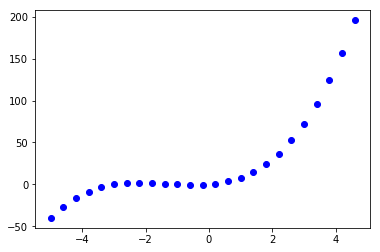

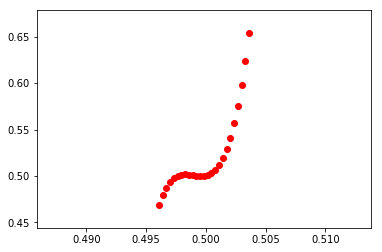

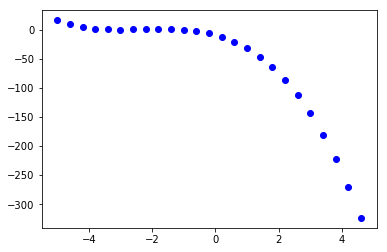

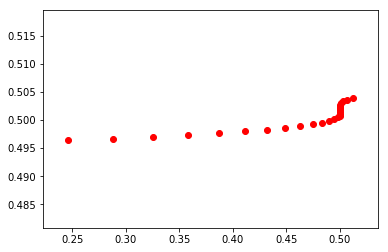

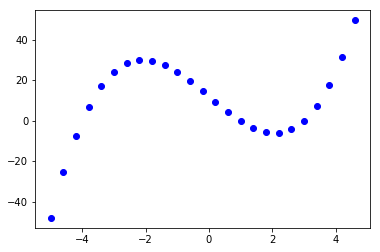

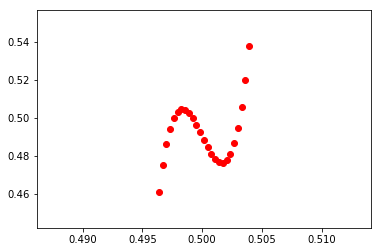

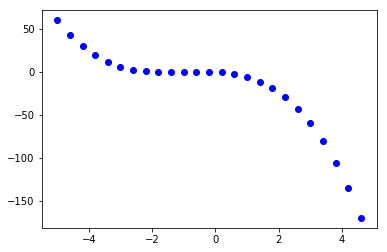

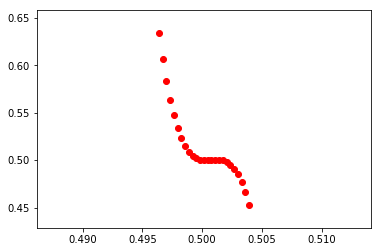

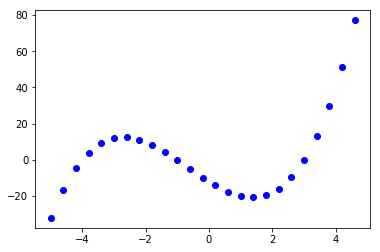

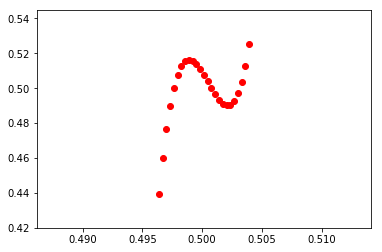

In [6]:
for _ in range(5): # spremeni range(5), ce zelis vec ali manj izrisanih grafov
    a = np.random.randint(gen_data.shape[0])
    points1 = gen_data[a]
    points2 = norm_rot_data[a]
    plt.scatter(points1[:,0], points1[:,1], color='blue')
    plt.show()
    plt.scatter(points2[:,0], points2[:,1], color='red')
    plt.show()


In [7]:
def partition_data(data, ts_in, ts_out):
    """
    The method partition the "track" data of shape (n_of_tracks, n_of_points_per_track, n_of_dim_per_point) into 
    two datasets of tracks representing the input and output of our model, with length ts_in and ts_out respectively.
    Parameters:
        - data (np.array), the dataset to be partitioned of shape (n_of_tracks, n_of_points_per_track, n_of_dim_per_point)
        - ts_in (int), length of the needed input dataset
        - ts_out (int), length of the needed output dataset

    NOTE: ts_in + ts_out < n_of_points_per_track
    """
    print(data.shape)
    data_in = []
    data_out = []
    r = data.shape[1]
    for f in data:
        for i in range(r//(ts_in + ts_out)):
            backwards = np.random.randint(2)
            
            if backwards % 2 == 0:
                f = np.flip(f,0)
                
            new_in = f[i:i + ts_in]
            new_out = f[i + ts_in:i + ts_in + ts_out]    
            data_in.append(new_in)
            data_out.append(new_out)
            
    data_in = np.array(data_in)
    data_out = np.array(data_out)
    
    return data_in, data_out
    
data_in, data_out = partition_data(norm_rot_data, 15, 5)

(100000, 25, 2)


52514


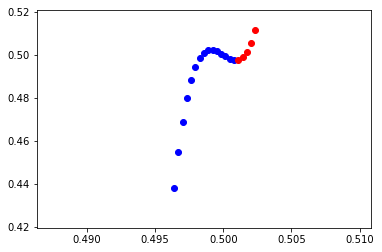

66496


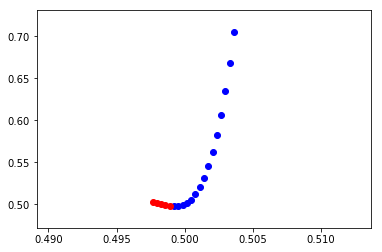

30875


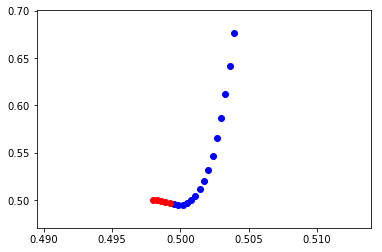

45818


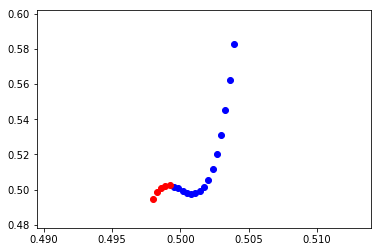

23355


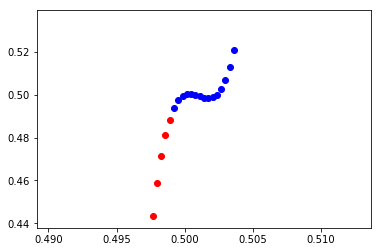

In [8]:
for _ in range(5):
    i = np.random.randint(data_in.shape[0])
    print(i)
    plt.scatter(data_in[i,:,0],data_in[i,:,1], color='blue')
    plt.scatter(data_out[i,:,0],data_out[i,:,1], color='red')
    plt.show()

In [9]:
def split_data(data, train_per=0.8, val_per=0.1, test_per=0.1):
    """
    The method splits our dataset over axis=0 into three datasets, training data, validation data and test data.
    Parameters:
        - data (np.array), the dataset to be split,
        - train_per (float), the % of the data to be used for the training set,
        - val_per (float), the % of the data to be used for the validation set,
        - test_per (float), the % of the data to be used for the test set.
    """
        
    train_ind = int(data.shape[0] * train_per)
    val_ind = int(data.shape[0] * (train_per + val_per))
    train_data = data[:train_ind]
    val_data = data[train_ind:val_ind]
    test_data = data[val_ind:]
    
    return train_data, val_data, test_data

In [11]:
# The directory to save the datasets.
DATA_DIR = '../.datasets/sintetic_STS/rot_polinomials/'

train_data_in, val_data_in, test_data_in = split_data(data_in)
train_data_out, val_data_out, test_data_out = split_data(data_out)

np.save('%strain_data_in.npy' %DATA_DIR, train_data_in)
np.save('%sval_data_in.npy' %DATA_DIR, val_data_in)
np.save('%stest_data_in.npy' %DATA_DIR, test_data_in)

np.save('%strain_data_out.npy' %DATA_DIR, train_data_out)
np.save('%sval_data_out.npy' %DATA_DIR, val_data_out)
np.save('%stest_data_out.npy' %DATA_DIR, test_data_out)

In [2]:
# This cell is here only for the second, third, ... pass through the code. 
# If we have allready genereated our data sets we can just read them instead of going through the former process again.
DATA_DIR = '../.datasets/sintetic_STS/rot_polinomials/'

train_data_in = np.load('%strain_data_in.npy' %DATA_DIR)
val_data_in = np.load('%sval_data_in.npy' %DATA_DIR)
test_data_in = np.load('%stest_data_in.npy' %DATA_DIR)

train_data_out = np.load('%strain_data_out.npy' %DATA_DIR)
val_data_out = np.load('%sval_data_out.npy' %DATA_DIR)
test_data_out = np.load('%stest_data_out.npy' %DATA_DIR)

In [3]:
import keras
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector


Using TensorFlow backend.


In [4]:
def seqToSeq_model(n_of_features, input_sequence_length, output_sequence_length):
    
    hidden_neurons = 2500
    model = keras.models.Sequential()

    ##Encoder
    model.add(LSTM(hidden_neurons,
              input_shape=(input_sequence_length, n_of_features),
              return_sequences=False
              ))
    print(model.outputs)
    model.add(Dense(hidden_neurons, activation='relu'))
    model.add(Dropout(0.5))

    print(model.outputs)
    model.add(RepeatVector(output_sequence_length))
    print(model.outputs)
    
    ##Decoder
    model.add(LSTM(hidden_neurons,
              return_sequences=True))

    print(model.outputs)
    model.add(TimeDistributed(Dense(n_of_features, activation='relu')))
    print(model.outputs)

    return model

In [5]:
from keras.models import model_from_json

def load_model(model_dir):
    """
    This method loads a previously traned model from model_dir.
    Parameters:
        - model_dir (string), a directory where the model and its weights are saved.
    """
    try:
        f = open('%smodel' %model_dir, 'r')
        json_string = f.read()

        model = model_from_json(json_string)
        model.load_weights('%sweights' %model_dir)
        print('Model loaded!')

        return model

    except FileNotFoundError:
        print('Could not load model!')


def save_model(model_dir, model):
    """
    This method saves the model to the model_dir directory.
    Properties:
        - model (keras.model), a trained keras model,
        - model_dir (string), the directory to save the model to.
    """
    json_string = model.to_json()

    f = open('%smodel' %model_dir, 'w+')
    f.write(json_string)
    f.close()

    model.save_weights('%sweights' %model_dir)
    print("Model saved!")

In [ ]:
MODEL_DIR = 'model/rot_polinomials/'

model = seqToSeq_model(2, 15, 5)

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(train_data_in, train_data_out, epochs=10, batch_size=20, validation_data=(val_data_in, val_data_out))

In [ ]:
MODEL_DIR = 'model/rot_polinomials/'
#save_model(MODEL_DIR, model)


#model = load_model(MODEL_DIR)
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(train_data_in, train_data_out, epochs=10, batch_size=100, validation_data=(val_data_in, val_data_out))

pred = model.predict(test_data_in)

1745


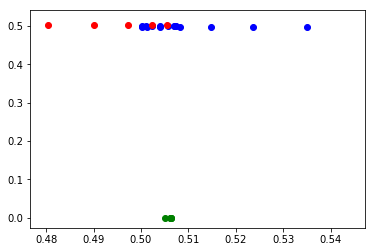

2185


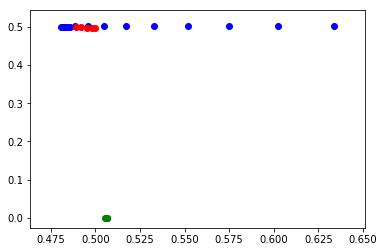

7662


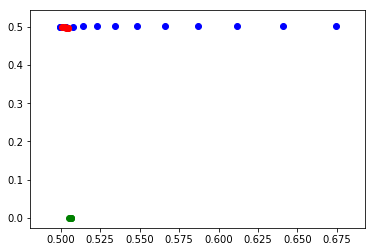

7855


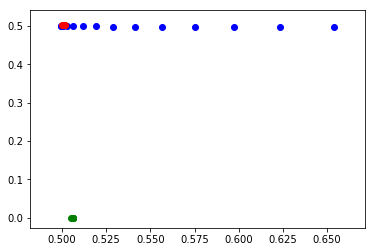

2562


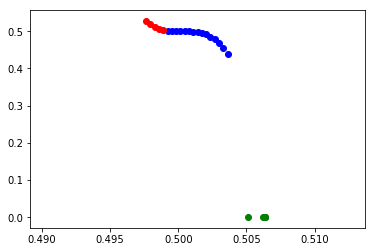

8478


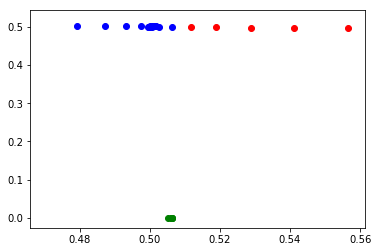

524


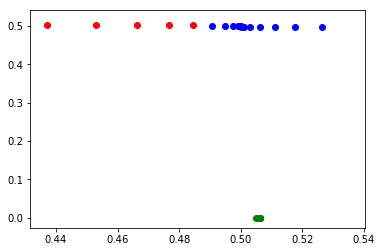

3497


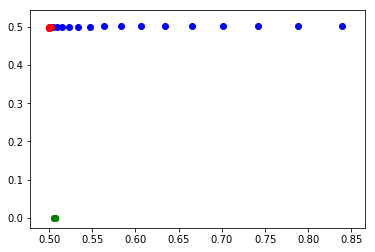

4308


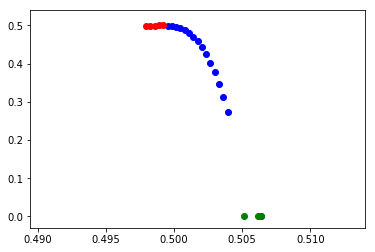

6113


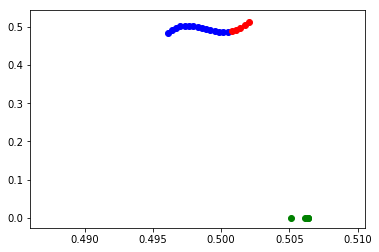

6333


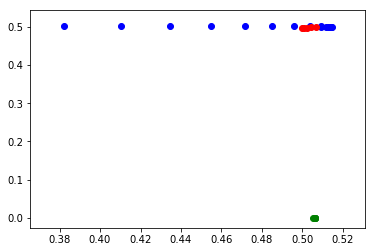

7906


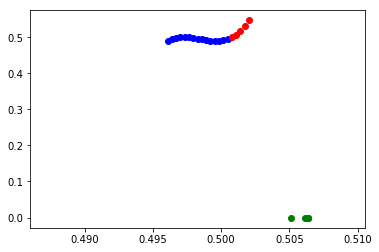

9013


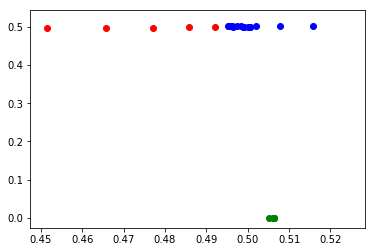

1011


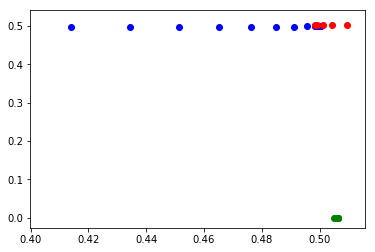

3384


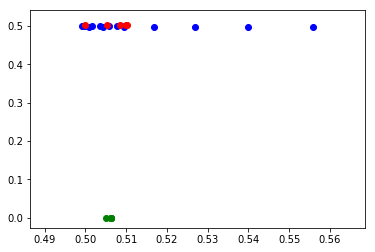

286


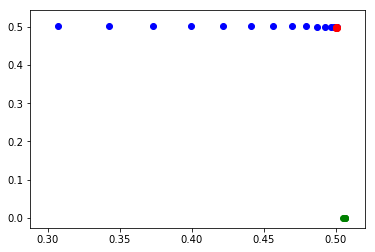

8344


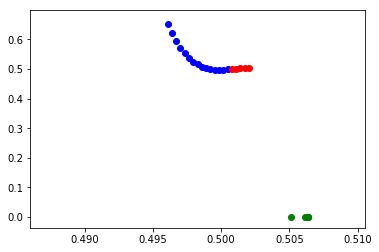

3968


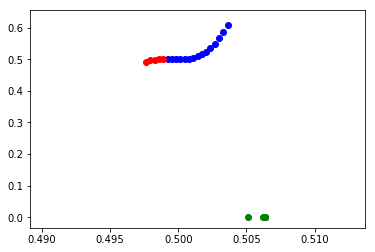

5328


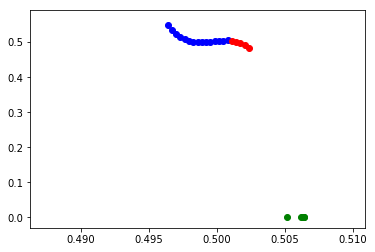

7280


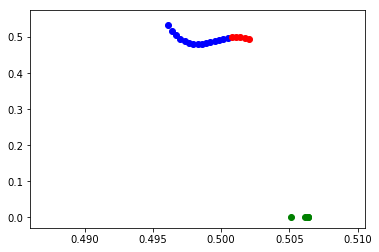

4894


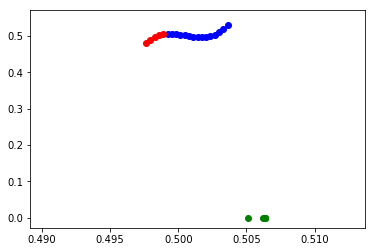

5090


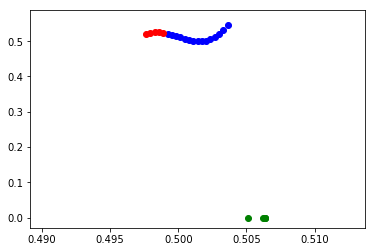

886


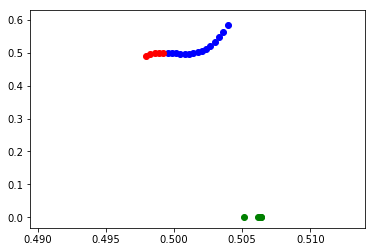

6893


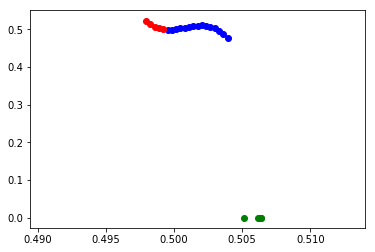

8919


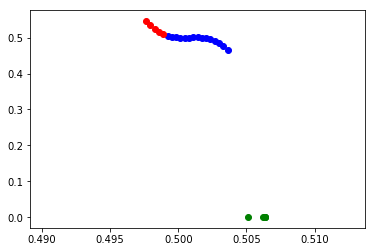

6804


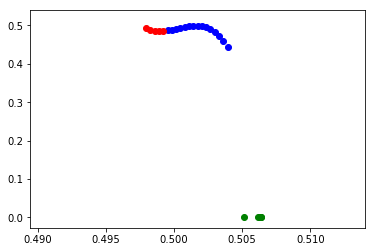

58


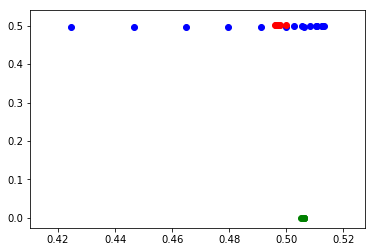

1964


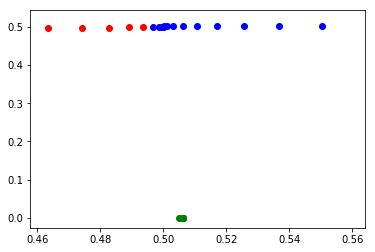

7775


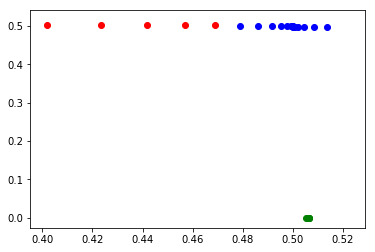

404


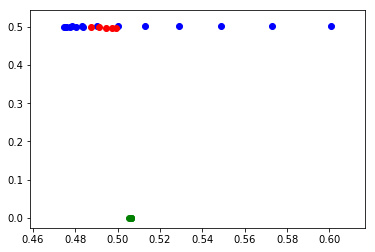

3984


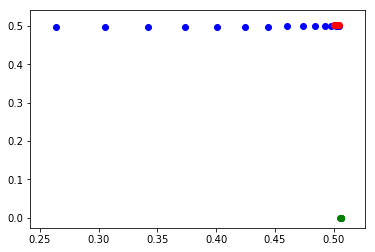

939


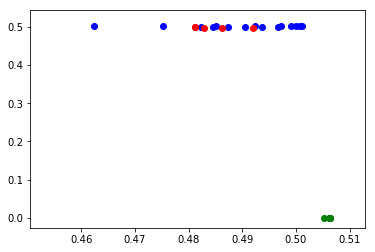

8744


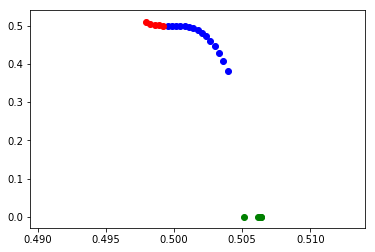

1818


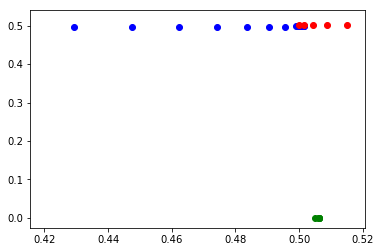

868


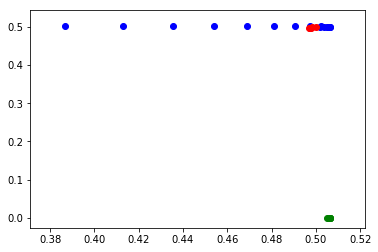

9196


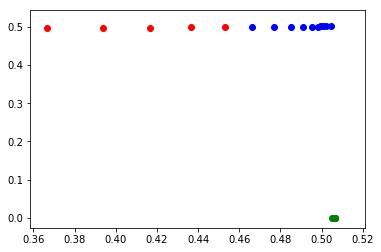

1917


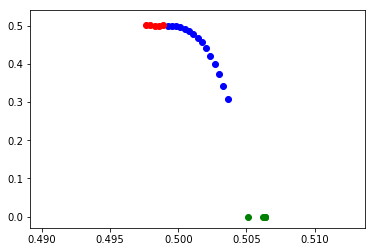

483


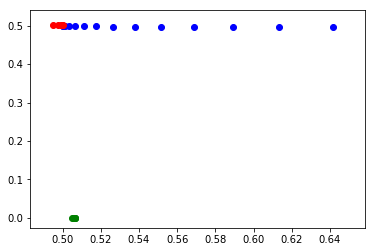

6467


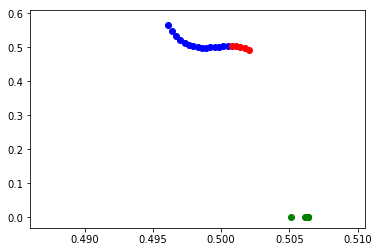

6341


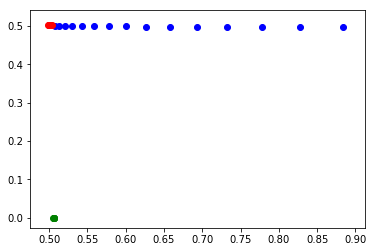

6689


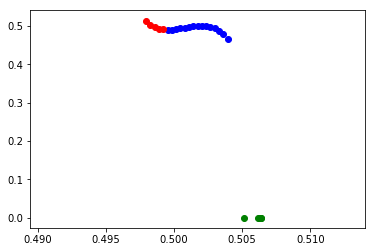

59


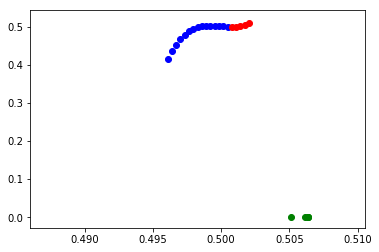

9657


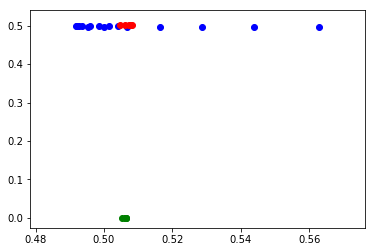

3239


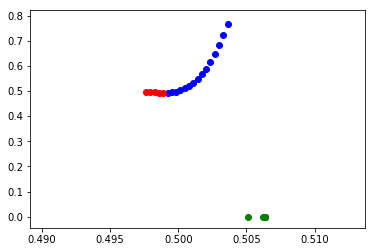

5852


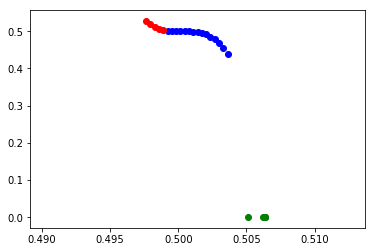

6982


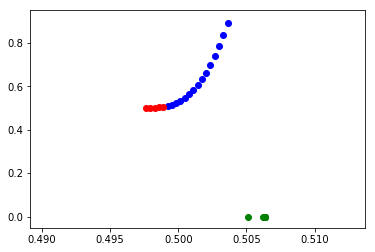

1640


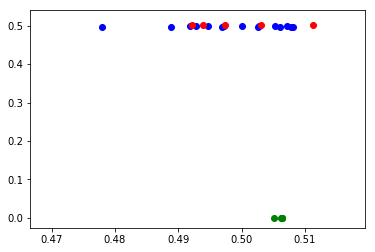

7033


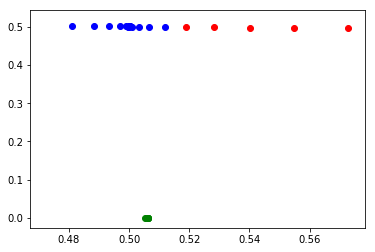

8478


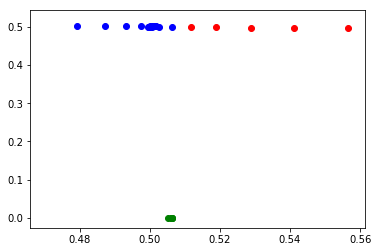

5975


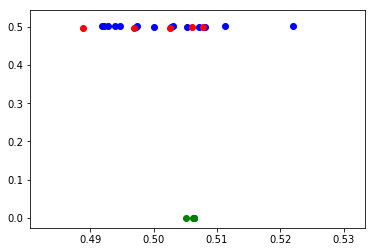

In [9]:
for _ in range(50):
    i = np.random.randint(val_data_in.shape[0])
    print(i)
    plt.scatter(test_data_in[i,:,0],test_data_in[i,:,1], color='blue')
    plt.scatter(test_data_out[i,:,0],test_data_out[i,:,1], color='red')
    plt.scatter(pred[i,:,0], pred[i,:,1], color='green')
    plt.show()